# Predicting Credit Card Fraud

Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content:

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration:

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Import and Read in data

In [88]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,classification_report
from sklearn.preprocessing import label_binarize

In [3]:
%pwd

'C:\\Users\\liuzh'

In [4]:
df = pd.read_csv("C:/Users/liuzh/Desktop/creditcard.csv")

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data preprocessing

1.Find The time when MOST people make a transaction and the time fraud OFTEN happens.

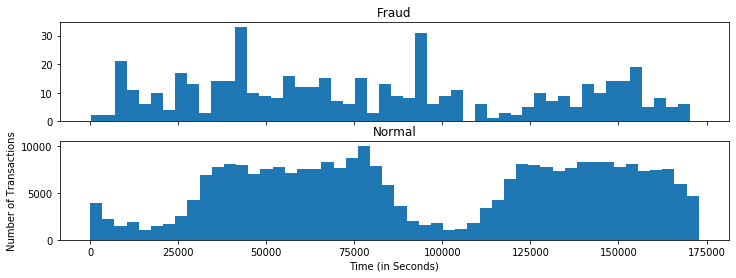

In [105]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Result: Fraudsters don't pick up time when the number of transfers is large.

2.Find the amount of money that often involve in a fraud. 

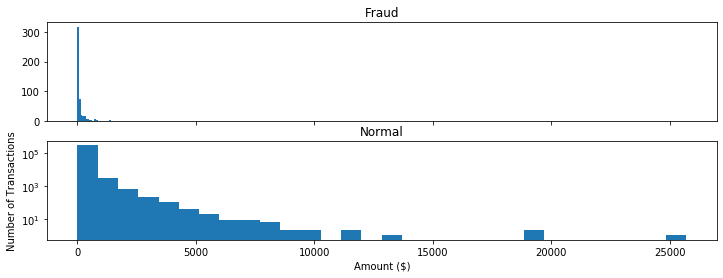

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Result: People mostly lose no more than $2000 in a fraud.

3.Find the time when people OFTEN make large transactions and the time Fraudsters can get more money than usual.

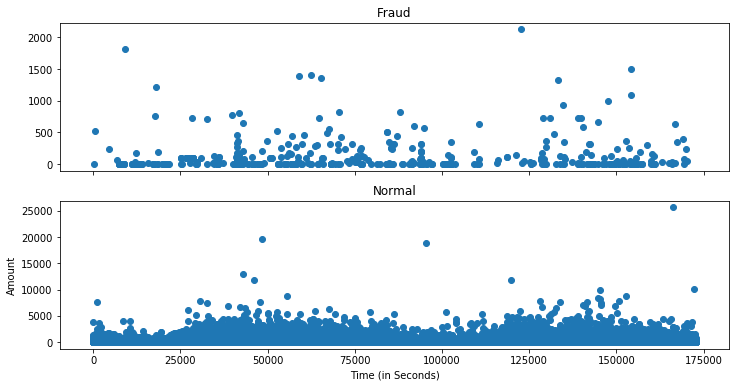

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Result: It seems that there is few evidence showing the relation between time and froud amount.

### Find if every features can influent people with their decision.

In [10]:
v_features = df.iloc[:,1:29].columns

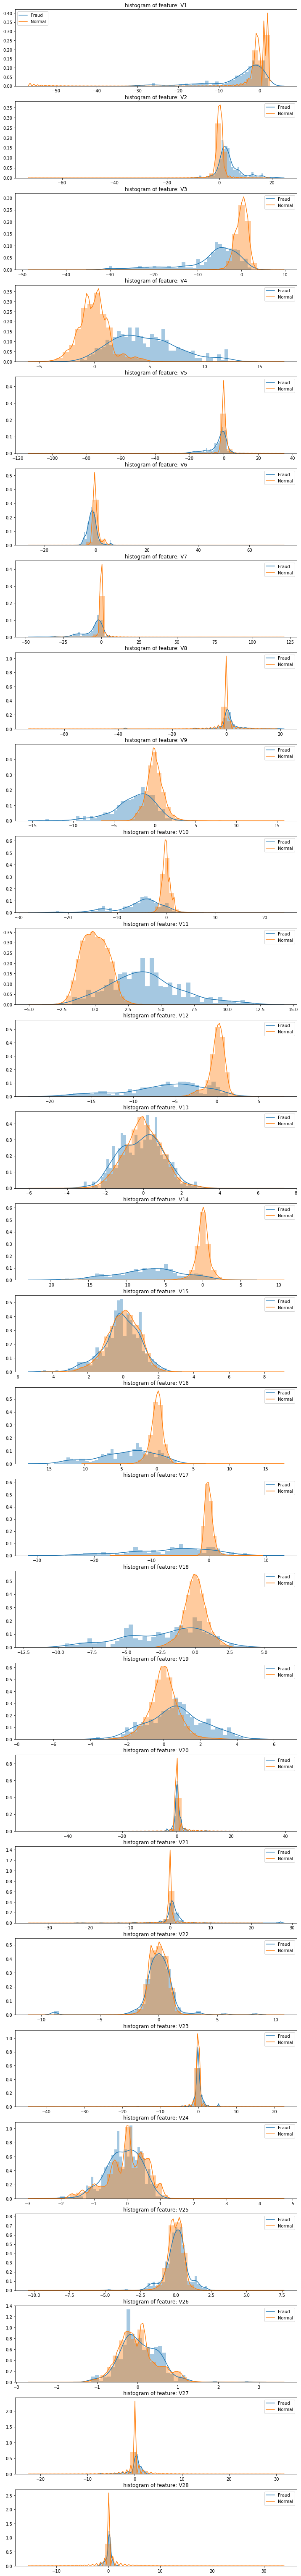

In [11]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1],kde_kws={"label":"Fraud"}, bins=40)
    sns.distplot(df[cn][df.Class == 0],kde_kws={"label":"Normal"}, bins=40)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Result: We found that lots of feature influent people in very limit ways so we drop those columns.

In [12]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V21','V15','V13','V8','V7','V6','V5'], axis =1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V9      284807 non-null  float64
 6   V10     284807 non-null  float64
 7   V11     284807 non-null  float64
 8   V12     284807 non-null  float64
 9   V14     284807 non-null  float64
 10  V16     284807 non-null  float64
 11  V17     284807 non-null  float64
 12  V18     284807 non-null  float64
 13  V19     284807 non-null  float64
 14  Amount  284807 non-null  float64
 15  Class   284807 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 34.8 MB


As is showed in the data set, no fraud over $2200 happens in 2 days, so we delete the lines where Anmount>2200.

In [14]:
df = df[df['Amount']<=2200]

## Split train set and test set

In [99]:
Y = df["Class"]
X = df.drop(["Class"],axis = 1)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [18]:
Y_test.sum()

133

## Build the model with RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest = RandomForestClassifier(n_jobs = -1,bootstrap = True,n_estimators=20)

In [21]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
forest.score(X_test,Y_test)

0.9996012759170654

In [23]:
Y_pre = forest.predict(X_test)

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
f1_score(Y_test,Y_pre)

0.8629032258064517

In [26]:
precision_score(Y_test,Y_pre)

0.9304347826086956

In [27]:
recall_score(Y_test,Y_pre)

0.8045112781954887

In [28]:
Y_pre.sum()

115

In [29]:
Y_test

284461    0
622       0
52214     0
84103     0
64245     0
         ..
105786    0
169431    0
170646    0
24486     0
37378     0
Name: Class, Length: 85272, dtype: int64

## Tune hyper-parameters with GridSearch

In [49]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test1, scoring='f1',cv=6)
gsearch1.fit(X_train,Y_train)
print( gsearch1.best_params_, gsearch1.best_score_)


{'n_estimators': 45} 0.8552169275008482


In [50]:
param_test2 = {'max_depth':[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=45),
                        param_grid = param_test2, 
                        scoring='f1',
                        cv=6)
gsearch2.fit(X_train,Y_train)
print( gsearch2.best_params_, gsearch2.best_score_)


{'max_depth': 70} 0.8520322782394109


In [51]:
param_test3 = {'min_samples_split':[5,10,15,20,25,30,35,40], 'min_samples_leaf':[2,4,6,7,8,9,10,15,20]}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 45, max_depth=70),
                        param_grid = param_test3, 
                        scoring='f1', 
                        cv=6)
gsearch3.fit(X_train,Y_train)
print( gsearch3.best_params_, gsearch3.best_score_)


{'min_samples_leaf': 2, 'min_samples_split': 10} 0.8389224547739941


In [54]:
param_test4 = {'max_features':[3,5,7,9,11,13]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 45, max_depth=70, min_samples_split=10,
                                  min_samples_leaf=2),
                        param_grid = param_test4,
                        scoring='f1',
                        cv=6)
gsearch4.fit(X_train,Y_train)
print( gsearch4.best_params_, gsearch4.best_score_)


{'max_features': 7} 0.8465316042143195


In [58]:
forest = RandomForestClassifier(n_jobs = -1,n_estimators=45, max_depth=70, min_samples_split=10,
                                  min_samples_leaf=2, max_features= 7)
forest.fit(X_train,Y_train)
Y_pre = forest.predict(X_test)
f1_score(Y_test,Y_pre)

0.880952380952381

F1 score = 0.880952380952381

## Result report

Receiver Operating Characteristic (ROC)

In [103]:
rec,fall_out,thresholds = roc_curve(Y_test,Y_pre)
Y_test

284461    0
622       0
52214     0
84103     0
64245     0
         ..
105786    0
169431    0
170646    0
24486     0
37378     0
Name: Class, Length: 85272, dtype: int64

In [104]:
Y_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

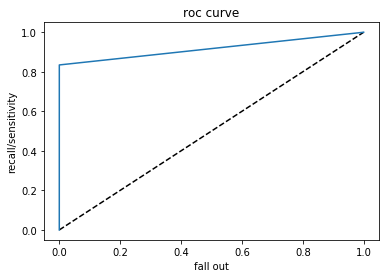

In [102]:
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out)
plt.xlabel('fall out')
plt.ylabel('recall/sensitivity')
plt.title('roc curve')
plt.show()

Precision-Recall

Text(0.5, 1.0, '2-class Precision-Recall curve')

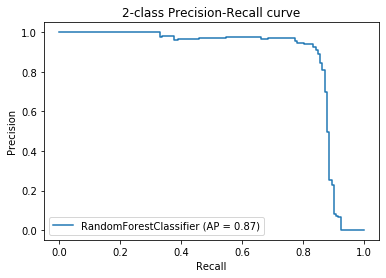

In [112]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(Y_test, Y_pre)
disp = plot_precision_recall_curve(forest, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

Result: The Area Under the Precision-Recall Curve (AUPRC) is 0.87